<div style="
    background: linear-gradient(120deg, #0f2027, #203a43, #2c5364);
    color: #e0f2fe;
    font-weight: 900;
    padding: 26px;
    border-radius: 18px;
    text-align: center;
    font-size: 33px;
    box-shadow:
        0 8px 25px rgba(0,0,0,0.6),
        inset 0 0 15px rgba(34, 211, 238, 0.6);
    font-family: 'Trebuchet MS', sans-serif;
    letter-spacing: 1px;
">
    <span style="color:#22d3ee;">Inferential Statistical</span><br>
    <span style="color:#f97316;">
        Analysis of Car Price
    </span>
</div>


<div style="
    background: #022c22;
    color: #34d399;
    font-weight: 800;
    padding: 20px;
    border-radius: 20px;
    text-align: center;
    font-size: 32px;
    box-shadow: 0 0 25px #10b981;
    font-family: Georgia, serif;
">
    Import Libraries, Statistical Methods, Algorithms, Metrics
</div>


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from statsmodels.stats.weightstats import ztest
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
df=pd.read_csv(r"C:\Users\Shuhaib\Downloads\Car_Price_Prediction.csv")

In [3]:
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

In [6]:
for x in df:
    print(x)
    print(df[x].unique())
    print(df[x].nunique())

Make
['Honda' 'Ford' 'BMW' 'Audi' 'Toyota']
5
Model
['Model B' 'Model C' 'Model A' 'Model D' 'Model E']
5
Year
[2015 2014 2006 2004 2000 2018 2021 2016 2007 2001 2019 2017 2010 2009
 2003 2012 2008 2002 2020 2011 2005 2013]
22
Engine Size
[3.9 1.7 4.1 2.6 3.4 2.7 1.3 2.  4.4 2.1 4.5 4.  3.1 1.1 4.2 3.  2.2 1.5
 2.9 1.  1.2 3.5 1.9 3.8 4.3 1.6 2.8 2.4 1.8 3.7 3.6 3.3 2.5 2.3 1.4 3.2]
36
Mileage
[ 74176  94799  98385  88919 138482  81462 179340 165320  31159  42039
  47800  40761  94626 118368 174735  80903 171484 118998 166439 136885
  59894  51444 165341  61748  41190  40318 168090 124078  39759  16498
  25989 156640 117035  66577 105231 161171  89900 171711 104679  23482
  69212 186333  30048 134137 133108  35814 190766 147996 129493  60204
  32844  81943  21518 148131  23052  69803  71524  89572 139752  67021
  20043   2419 187964 121831 101799 148212 174556 194941 176282  57600
 116467  78497 108611 137559  60692  62112 162182  16360 180482  83038
   3017  86261 191196 182021 189340

<div style="
    background: linear-gradient(135deg, #1e293b, #0f172a);
    color: #fbbf24;
    font-weight: 800;
    padding: 22px;
    border-radius: 22px;
    text-align: left;
    font-size: 32px;
    box-shadow: 0 0 30px rgba(251, 191, 36, 0.7);
    font-family: Georgia, serif;
    border: 2px solid #38bdf8;
">
    EDA
</div>


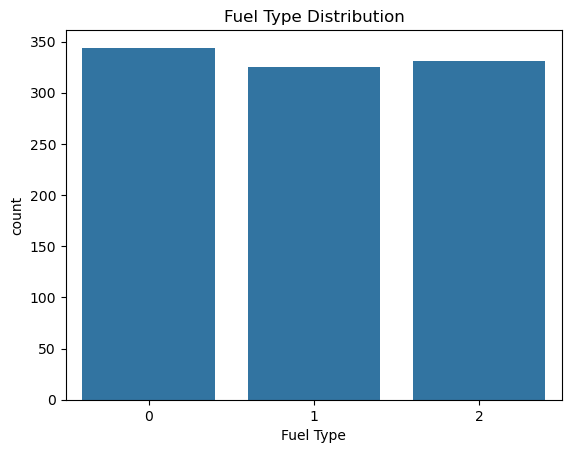

In [54]:
sns.countplot(x='Fuel Type', data=df)
plt.title("Fuel Type Distribution")
plt.show()


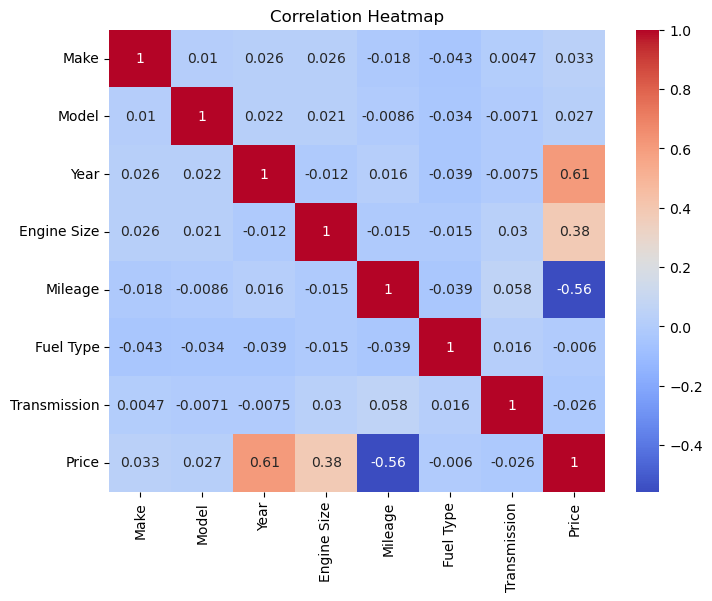

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<div style="
    background: linear-gradient(135deg, #1e293b, #0f172a);
    color: #fbbf24;
    font-weight: 800;
    padding: 22px;
    border-radius: 22px;
    text-align: left;
    font-size: 32px;
    box-shadow: 0 0 30px rgba(251, 191, 36, 0.7);
    font-family: Georgia, serif;
    border: 2px solid #38bdf8;
">
    KRUSKAL
</div>


Compare 3 or more independent groups when data is not normally distributed.
(Non-parametric alternative to One-Way ANOVA.)

## Null Hypothesis (H₀)The median vehicle prices are equal across all fuel types.Mathematically:
Median(Price | Petrol)==Median(Price | Hybrid)=…Median(Price | Petrol)=Median(Price | Diesel)=Median(Price | Hybrid)

## Alternative Hypothesis (H₁)At least one fuel type has a different median price.Mathematically:Median(Price | at least one Fuel Type)Median(Price | others)Median(Price | at least one Fuel Type)=dian(Price | others)

In [59]:
from scipy.stats import kruskal

# Group Price by Fuel Type
groups = []
for fuel in df['Fuel Type'].unique():
    groups.append(df[df['Fuel Type'] == fuel]['Price'])

# Kruskal–Wallis Test
stat, p = kruskal(*groups)

print("Kruskal-Wallis Statistic:", stat)
print("P-value:", p)


Kruskal-Wallis Statistic: 0.18771577191546385
P-value: 0.9104121353963692


<div style="
    background: linear-gradient(135deg, #1e293b, #0f172a);
    color: #fbbf24;
    font-weight: 800;
    padding: 22px;
    border-radius: 22px;
    text-align: left;
    font-size: 32px;
    box-shadow: 0 0 30px rgba(251, 191, 36, 0.7);
    font-family: Georgia, serif;
    border: 2px solid #38bdf8;
">
    Z-TEST
</div>


### Null Hypothesis :There is no significant difference in mean Price between approved and rejected applicants
### Alternative Hypothesis :There is a significant difference in mean Price between approved and rejected applicants

In [8]:
trans_auto=df[df['Transmission']=='Manual']['Price']
trance_manual=df[df['Transmission']=='Automatic']['Price']

In [9]:
z_stat,p_value=ztest(trans_auto,trance_manual,value=0)

In [10]:
print('z-statistic:',z_stat)
print('p-value:',p_value)

z-statistic: -0.8084341879393073
p-value: 0.4188406776810014


In [11]:
alpha=0.05
if p_value<alpha:
    print('Reject the Null Hypothesis')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


In [12]:
df["Fuel or ev"] = df["Fuel Type"].apply(
    lambda x: "fuel" if x in ["Petrol", "Diesel"] else "EV"
)
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price,Fuel or ev
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931,fuel
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684,EV
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347,EV
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491,EV
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657,fuel
...,...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091,fuel
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567,fuel
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292,fuel
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708,fuel


<div style="
    background: linear-gradient(135deg, #1e293b, #0f172a);
    color: #fbbf24;
    font-weight: 800;
    padding: 22px;
    border-radius: 22px;
    text-align: left;
    font-size: 32px;
    box-shadow: 0 0 30px rgba(251, 191, 36, 0.7);
    font-family: Georgia, serif;
    border: 2px solid #38bdf8;
">
    T-TEST
</div>


# H₀ (Null Hypothesis):There is no significant difference in the average price of fuel vehicles and EV vehicles.

# H₁ (Alternative Hypothesis):There is a significant difference in the average price of fuel vehicles and EV vehicles.

In [13]:
fuel_pet=df[df['Fuel or ev']=='fuel']['Price']
fuel_ev=df[df['Fuel or ev']=='EV']['Price']


In [14]:
from scipy.stats import ttest_ind

In [15]:
t_stat, p_value = ttest_ind(fuel_pet, fuel_ev, equal_var=False)

In [16]:
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -0.35607458644743845
P-value: 0.7218959052162824


In [17]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference exists Fuel or ev & Price")
else:
    print("Fail to reject the null hypothesis: No significant difference between Fuel or ev & Price ")

Fail to reject the null hypothesis: No significant difference between Fuel or ev & Price 


<div style="
    background: linear-gradient(135deg, #1e293b, #0f172a);
    color: #fbbf24;
    font-weight: 800;
    padding: 22px;
    border-radius: 22px;
    text-align: left;
    font-size: 32px;
    box-shadow: 0 0 30px rgba(251, 191, 36, 0.7);
    font-family: Georgia, serif;
    border: 2px solid #38bdf8;
">
   CHI2
</div>


In [18]:
from scipy.stats import chi2_contingency

In [19]:
categorical_cols=['Make','Model','Fuel Type']

In [20]:
 for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Transmission'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    print(contingency_table)
    print(expected)
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p_val}")
    if p_val < 0.05:
        print(f"There is a statistically significant association between {col} and Price.")
    else:
        print(f"There is no statistically significant association between {col} and Price.")
    print("\n")

Transmission  Automatic  Manual
Make                           
Audi                 92     120
BMW                  96      82
Ford                119     106
Honda               102      96
Toyota               80     107
[[103.668 108.332]
 [ 87.042  90.958]
 [110.025 114.975]
 [ 96.822 101.178]
 [ 91.443  95.557]]
Chi2 Statistic: 9.150990897501604
P-value: 0.05743426137701178
There is no statistically significant association between Make and Price.


Transmission  Automatic  Manual
Model                          
Model A              99     103
Model B             101     111
Model C             106      99
Model D              87     110
Model E              96      88
[[ 98.778 103.222]
 [103.668 108.332]
 [100.245 104.755]
 [ 96.333 100.667]
 [ 89.976  94.024]]
Chi2 Statistic: 3.340652574863543
P-value: 0.5025170961415475
There is no statistically significant association between Model and Price.


Transmission  Automatic  Manual
Fuel Type                      
Diesel            

<div style="
    background: linear-gradient(135deg, #1e293b, #0f172a);
    color: #fbbf24;
    font-weight: 800;
    padding: 22px;
    border-radius: 22px;
    text-align: left;
    font-size: 32px;
    box-shadow: 0 0 30px rgba(251, 191, 36, 0.7);
    font-family: Georgia, serif;
    border: 2px solid #38bdf8;
">
   ANOVA
</div>


In [21]:
anova_data = df[['Transmission', 'Price']]

In [22]:
anova_data

,Transmission,Price
0,Manual,30246.207931
1,Automatic,22785.747684
2,Manual,25760.290347
3,Automatic,25638.003491
4,Automatic,21021.386657
...,...,...
995,Manual,22765.597091
996,Manual,30392.575567
997,Automatic,16446.892292
998,Automatic,27396.156708


In [23]:
groups = anova_data.groupby('Transmission')['Price'].apply(list)

In [24]:
groups

Transmission
Automatic    [22785.747684331356, 25638.00349070714, 21021....
Manual       [30246.20793120509, 25760.290347165286, 25509....
Name: Price, dtype: object

In [25]:
f_statistic, p_value = stats.f_oneway(*groups)

In [26]:
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 0.6535658362291031
P-value: 0.4190333428893902


In [27]:
if p_value < 0.05:
    print("There are significant differences between the groups.")
else:
    print("There are no significant differences between the groups.")

There are no significant differences between the groups.


In [28]:
df=df.drop(['Fuel or ev'],axis=1)

In [29]:
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


<div style="
    background: linear-gradient(135deg, #1e293b, #0f172a);
    color: #fbbf24;
    font-weight: 800;
    padding: 22px;
    border-radius: 22px;
    text-align: left;
    font-size: 32px;
    box-shadow: 0 0 30px rgba(251, 191, 36, 0.7);
    font-family: Georgia, serif;
    border: 2px solid #38bdf8;
">
    ENCODING
</div>


In [30]:
le=LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])



In [31]:
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,30246.207931
1,2,2,2014,1.7,94799,1,0,22785.747684
2,1,1,2006,4.1,98385,1,1,25760.290347
3,3,1,2015,2.6,88919,1,0,25638.003491
4,3,2,2004,3.4,138482,2,0,21021.386657
...,...,...,...,...,...,...,...,...
995,4,3,2002,1.9,5445,2,1,22765.597091
996,3,1,2020,3.1,149112,0,1,30392.575567
997,2,2,2008,1.9,195387,2,0,16446.892292
998,4,0,2003,4.4,246,2,0,27396.156708


In [32]:
X = df.drop("Price", axis=1)

In [33]:
y=df['Price']
y

0      30246.207931
1      22785.747684
2      25760.290347
3      25638.003491
4      21021.386657
           ...     
995    22765.597091
996    30392.575567
997    16446.892292
998    27396.156708
999    31620.864907
Name: Price, Length: 1000, dtype: float64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

<div style="
    background: linear-gradient(135deg, #1e293b, #0f172a);
    color: #fbbf24;
    font-weight: 800;
    padding: 22px;
    border-radius: 22px;
    text-align: left;
    font-size: 32px;
    box-shadow: 0 0 30px rgba(251, 191, 36, 0.7);
    font-family: Georgia, serif;
    border: 2px solid #38bdf8;
">
    F-TEST
</div>


In [37]:
y_pred_lr_cont = lin_reg.predict(X_test)
y_pred_lr = np.where(y_pred_lr_cont >= 0.5, 1, 0)


In [38]:
n=len(y_test)
p=X_train.shape[1]

In [39]:
RSS=np.sum((y_test-y_pred_lr)**2)
(RSS)

np.float64(131288741771.05042)

In [40]:
TSS=np.sum((y_test-np.mean(y_test))**2)
(TSS)

np.float64(5473337027.216954)

In [41]:
ESS=TSS-RSS
(ESS)

np.float64(-125815404743.83347)

In [42]:
MSR = ESS / p
(MSR)

np.float64(-17973629249.11907)

In [43]:
MSE=RSS/(n-p-1)
MSE

np.float64(683795530.0575542)

In [44]:
f_stati=MSR/MSE
f_stati

np.float64(-26.285093217275417)

In [45]:
from scipy import stats

In [46]:
p_value=1-stats.f.cdf(f_stati,p,n-p-1)
p_value

np.float64(1.0)

In [47]:
print('f-statistic',f_stati)
print('p_value',p_value)

f-statistic -26.285093217275417
p_value 1.0


In [48]:
if p_value < 0.05:
    print('The model is significant at the 5% significance level.')
else:
    print('The model is not significant at the 5% significance level.')

The model is not significant at the 5% significance level.


In [49]:
MSE

np.float64(683795530.0575542)

In [50]:
from sklearn.metrics import mean_squared_error,r2_score

In [51]:
mse=mean_squared_error(y_test,y_pred_lr)
mse

656443708.855252

<div style="
    background: linear-gradient(135deg, #1e293b, #0f172a);
    color: #fbbf24;
    font-weight: 800;
    padding: 22px;
    border-radius: 22px;
    text-align: center;
    font-size: 32px;
    box-shadow: 0 0 30px rgba(251, 191, 36, 0.7);
    font-family: Georgia, serif;
    border: 2px solid #38bdf8;
">
    CONCLUSION
</div>


#### Based on the columns you listed (Make, Model, Year, Engine Size, Mileage, Fuel Type, Transmission, Price), here is a **general conclusion** you can use for a vehicle comparison table:**Conclusion:**the table provides a clear overview of vehicles by comparing key factors such as brand, model year, engine size, mileage, fuel type, transmission, and price. Newer models with lower mileage and efficient engine sizes tend to have higher prices, while older vehicles with higher mileage are generally more affordable. Fuel type and transmission also influence value, with automatic and fuel-efficient options often costing more. Overall, the table helps buyers evaluate performance, cost, and value for money, making it easier to choose a vehicle that fits their budget and driving needs.If you want, you can share the actual data and I can write a **specific, data-driven conclusion** instead.
